In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(10738, 12)


,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


# Missing values

In [3]:
data.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

# Target variable

In [6]:
data['customer_category'].unique()

array([0, 1])

(0.0, 10491.0)

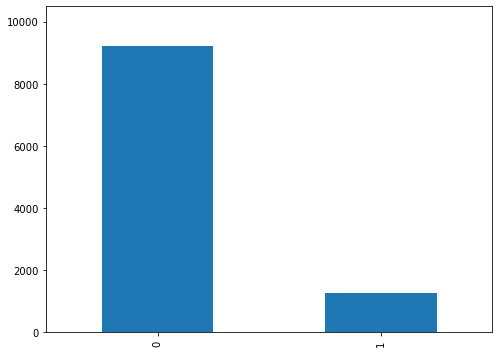

In [7]:
plt.figure(figsize = (8,6))
data['customer_category'].value_counts().plot.bar()
plt.ylim(0,len(data))

# Customer Visit score

a score based on how regularly the customer visits the website

In [8]:
data['customer_visit_score'].describe()

count    10491.000000
mean        19.045315
std          7.410739
min          0.568965
25%         13.517296
50%         18.759823
75%         24.456236
max         47.306691
Name: customer_visit_score, dtype: float64

In [9]:
data.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

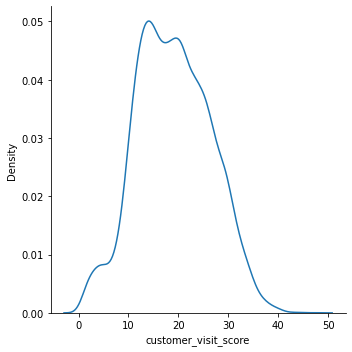

In [20]:
sns.displot(x = 'customer_visit_score',data = data,kind = 'kde')

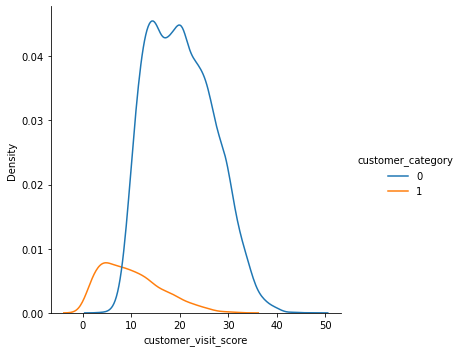

In [21]:
sns.displot(x = 'customer_visit_score',hue = 'customer_category',data = data,kind = 'kde')

- Group 0 - mean = 20.28, std_dev = 6.67
- Group 1 - mean = 10.06, std_dev=6.21

In [23]:
cat_0 = data[data['customer_category'] == 0]
cat_1 = data[data['customer_category'] == 1]

In [26]:
cat_0['customer_visit_score'].describe()

count    9222.000000
mean       20.280949
std         6.674475
min         3.635497
25%        14.801980
50%        19.855738
75%        25.193694
max        47.306691
Name: customer_visit_score, dtype: float64

In [27]:
cat_1['customer_visit_score'].describe()

count    1269.000000
mean       10.065794
std         6.211077
min         0.568965
25%         4.928180
50%         9.100922
75%        13.982178
max        31.757374
Name: customer_visit_score, dtype: float64

### Conclusion - 
- ### Customers belonging to group 1 visit the website less regularly. 
- ### For group 0, avg visit score is around 20
- ### For group 1, avg visit score is around 10 
- ### Spread for both of them is similar

# Customer product search score

quality or price range of product that the customer searches for.

In [28]:
data['customer_product_search_score'].describe()


count    10491.000000
mean         5.276097
std          1.883255
min         -0.161940
25%          3.973447
50%          5.218814
75%          6.517631
max         16.638243
Name: customer_product_search_score, dtype: float64

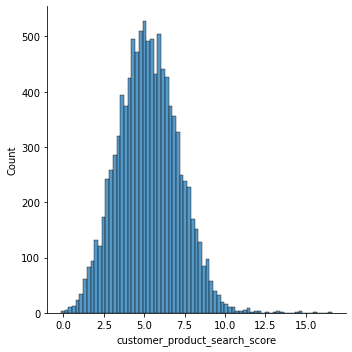

In [30]:
sns.displot(x = 'customer_product_search_score',data=data)

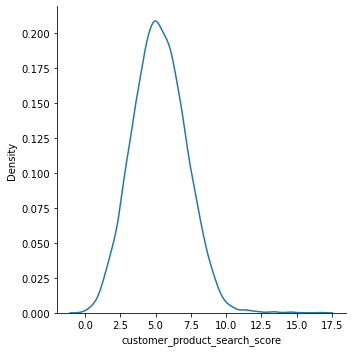

In [31]:
sns.displot(x = 'customer_product_search_score',data=data,kind='kde')

In [32]:
cat_0['customer_product_search_score'].describe()

count    9222.000000
mean        5.485772
std         1.775254
min         0.554452
25%         4.239743
50%         5.403560
75%         6.659664
max        16.638243
Name: customer_product_search_score, dtype: float64

In [33]:
cat_1['customer_product_search_score'].describe()

count    1269.000000
mean        3.752363
std         1.944081
min        -0.161940
25%         2.376711
50%         3.469642
75%         4.887549
max        14.601043
Name: customer_product_search_score, dtype: float64

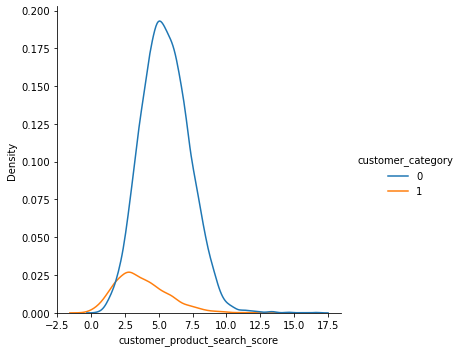

In [34]:
sns.displot(x = 'customer_product_search_score',data=data,kind='kde',hue='customer_category')

### Conclusion 
- ### Customers belonging to group 1 search for products with comparatively less quality/price
- ### For group 0: avg product search score is 5.46
- ### For group 1: avg product search score is 3.75
- ### Distribution of group 1 is right skewed

# Customer ctr score

how many of the searched links does the customer click

In [35]:
data['customer_ctr_score'].describe()

count    10491.000000
mean         0.176529
std          0.374141
min         -0.547989
25%          0.011027
50%          0.074312
75%          0.159700
max          2.679474
Name: customer_ctr_score, dtype: float64

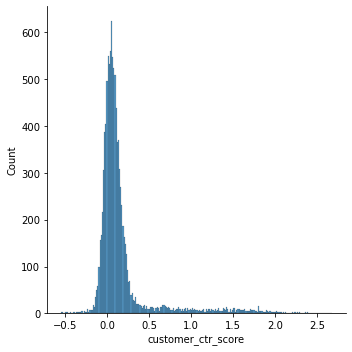

In [36]:
sns.displot(x='customer_ctr_score',data=data)

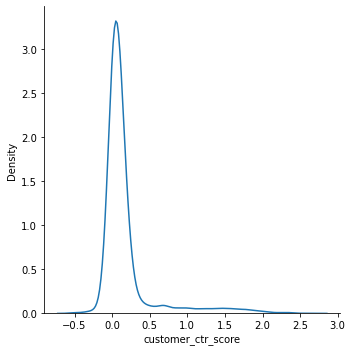

In [37]:
sns.displot(x='customer_ctr_score',data=data,kind='kde')

In [38]:
cat_0['customer_ctr_score'].describe()

count    9222.000000
mean        0.066357
std         0.104927
min        -0.547989
25%         0.003284
50%         0.059138
75%         0.123537
max         1.550160
Name: customer_ctr_score, dtype: float64

In [39]:
cat_1['customer_ctr_score'].describe()

count    1269.000000
mean        0.977166
std         0.590069
min        -0.030334
25%         0.483359
50%         0.902503
75%         1.438999
max         2.679474
Name: customer_ctr_score, dtype: float64

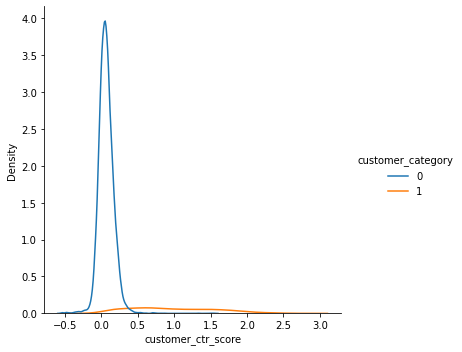

In [40]:
sns.displot(x='customer_ctr_score',data=data,kind='kde',hue='customer_category')

### CONCLUSION
- ### Customer belonging to group 0 have less ctr
- ### For group 0: mean ctr is 0.06, with a spread of 0.01
- ### For group 1: mean ctr is 0.98, with a spread of 0.60

# Customer stay score

a score based on the time spent on an avg. by the customer

In [41]:
data['customer_stay_score'].describe()

count    10491.000000
mean         0.375900
std          1.227358
min         -0.462494
25%         -0.027543
50%          0.037201
75%          0.179230
max         14.701914
Name: customer_stay_score, dtype: float64

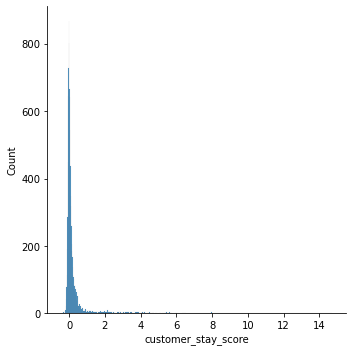

In [42]:
sns.displot(x='customer_stay_score',data=data)

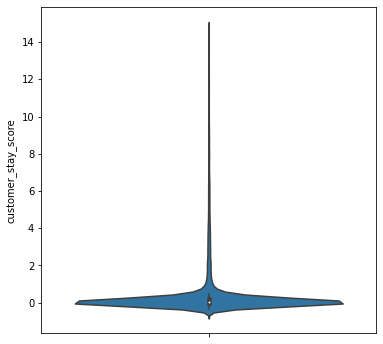

In [48]:
plt.figure(figsize = (6,6))
sns.violinplot(y='customer_stay_score',data=data)

In [49]:
cat_0['customer_stay_score'].describe()

count    9222.000000
mean        0.067044
std         0.190636
min        -0.462494
25%        -0.035616
50%         0.020342
75%         0.109930
max         5.311225
Name: customer_stay_score, dtype: float64

In [50]:
cat_1['customer_stay_score'].describe()

count    1269.000000
mean        2.620397
std         2.542148
min        -0.201716
25%         0.584998
50%         1.874978
75%         3.846894
max        14.701914
Name: customer_stay_score, dtype: float64

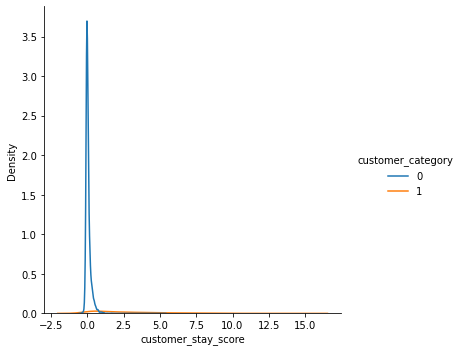

In [52]:
sns.displot(x='customer_stay_score',data=data,hue='customer_category',kind='kde')

### CONCLUSION
- ### Customers belonging to group 0 spend less time 
- ### Group 0: avg stay score is 0.067 with spread of 0.20 
- ### Group 1: avg stay score is 2.62 with spread of 2.5
- ### Group 0 customers are very alike, whereas group 1 customer are very spread

# Customer Frequency Score

a score based on how many times in a day the customer visit the website

In [54]:
data['customer_frequency_score'].describe()

count    10491.000000
mean         2.390171
std          5.626505
min          0.028575
25%          0.313869
50%          0.517888
75%          1.129530
max         52.395014
Name: customer_frequency_score, dtype: float64

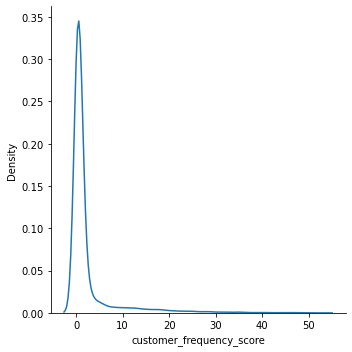

In [56]:
sns.displot(x='customer_frequency_score',data=data,kind='kde')

In [58]:
cat_0['customer_frequency_score'].describe()

count    9222.000000
mean        1.575126
std         4.545998
min         0.028575
25%         0.294270
50%         0.467887
75%         0.791359
max        52.395014
Name: customer_frequency_score, dtype: float64

In [59]:
cat_1['customer_frequency_score'].describe()

count    1269.000000
mean        8.313215
std         8.465926
min         0.083338
25%         1.985476
50%         5.120947
75%        12.630099
max        46.702995
Name: customer_frequency_score, dtype: float64

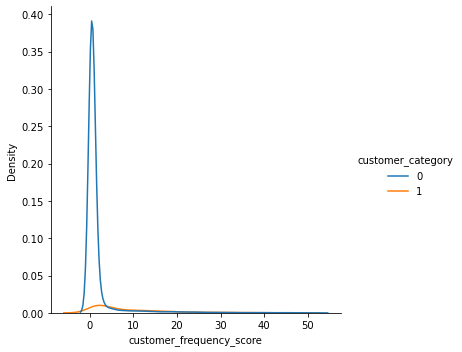

In [60]:
sns.displot(x='customer_frequency_score',data=data,kind='kde',hue='customer_category')

### CONCLUSION
- ### Customers belonging to group 0 visit less frequently on a day
- ### Group 0: mean frequency score is 1.57 with a spread of 4.54
- ### Group 1: mean frequency score is 8.31 with a spread of 8.46
- ### Group 1 have high spread

# Customer product variation score

a score based on how many varities of products does a customer search for, for ex. electronics, apparels, etc.

In [61]:
data['customer_product_variation_score'].describe()

count    10491.000000
mean         5.793689
std          2.536464
min          2.752836
25%          4.193434
50%          4.847741
75%          6.299480
max         18.743836
Name: customer_product_variation_score, dtype: float64

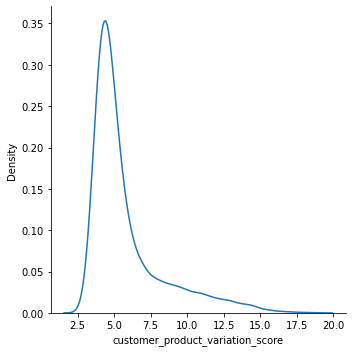

In [62]:
sns.displot(x='customer_product_variation_score',data=data,kind='kde')

In [63]:
cat_0['customer_product_variation_score'].describe()

count    9222.000000
mean        5.329229
std         2.134856
min         2.752836
25%         4.124600
50%         4.686939
75%         5.619608
max        18.743836
Name: customer_product_variation_score, dtype: float64

In [64]:
cat_1['customer_product_variation_score'].describe()

count    1269.000000
mean        9.168982
std         2.666636
min         3.147417
25%         7.252817
50%         9.049053
75%        11.093180
max        18.341869
Name: customer_product_variation_score, dtype: float64

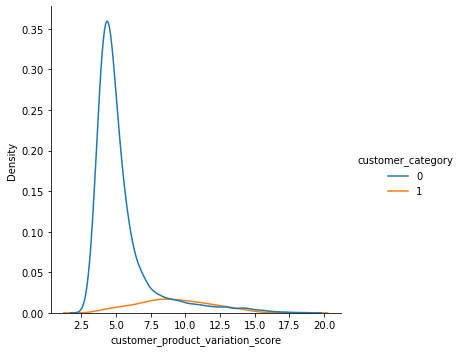

In [66]:
sns.displot(x='customer_product_variation_score',data=data,hue='customer_category',kind='kde')

### CONCLUSION
- ### Customer beloning to group 1 search for a more varities of products than group 0
- ### Group 0: mean product variation score is 5.39 with a spread of 2.13 
- ### Group 1: mean product variation score is 9.16 with a spread of 2.66

# customer_order_score

Score based on the no. of orders that has been succesfully delivered and not returned

In [67]:
data['customer_order_score'].describe()

count    10491.000000
mean         3.150056
std          1.037183
min          0.363338
25%          2.451044
50%          3.119300
75%          3.756174
max          9.090206
Name: customer_order_score, dtype: float64

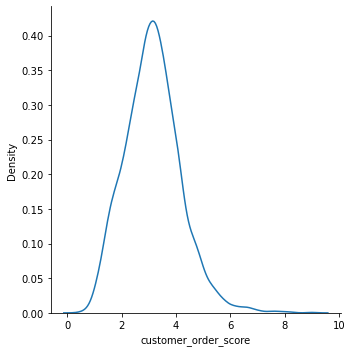

In [68]:
sns.displot(x='customer_order_score',data=data,kind='kde')

In [69]:
cat_0['customer_order_score'].describe()

count    9222.000000
mean        3.298201
std         0.990373
min         0.363338
25%         2.672750
50%         3.239974
75%         3.853131
max         9.090206
Name: customer_order_score, dtype: float64

In [70]:
cat_1['customer_order_score'].describe()

count    1269.000000
mean        2.073471
std         0.668738
min         0.721276
25%         1.619585
50%         1.964402
75%         2.378915
max         5.334711
Name: customer_order_score, dtype: float64

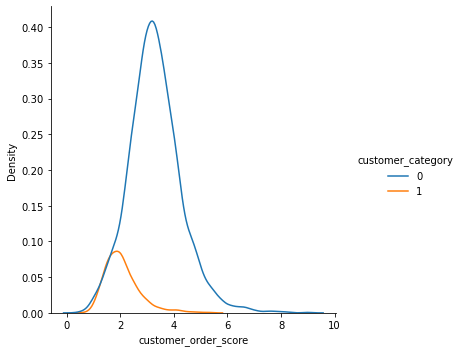

In [71]:
sns.displot(x='customer_order_score',data=data,hue='customer_category',kind='kde')

### CONCLUSION- 
- ### Customers belonging to category 2 have lower order score. 
- ### Their distribution is more similar than other features 
- ### Group 0: mean order score 3.3 with spread 0.99
- ### Group 1: mean order score 2.0 with spread 0.67

# customer_affinity_score

an internal overall score calculated which signifies the affinity(liking) of the customer towards the website

In [72]:
data['customer_affinity_score'].describe()

count    10491.000000
mean        17.053776
std         18.835444
min         -0.486834
25%          4.497328
50%         12.604271
75%         23.093926
max        248.552755
Name: customer_affinity_score, dtype: float64

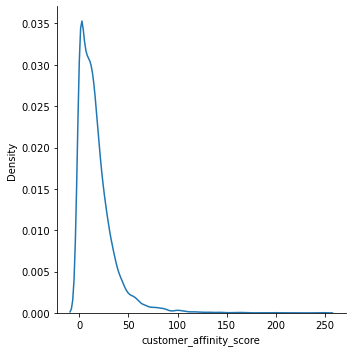

In [74]:
sns.displot(x='customer_affinity_score',data=data,kind='kde')

In [75]:
cat_0['customer_affinity_score'].describe()

count    9222.000000
mean       18.960165
std        19.063132
min        -0.486834
25%         7.033161
50%        14.352152
75%        24.830820
max       248.552755
Name: customer_affinity_score, dtype: float64

In [76]:
cat_1['customer_affinity_score'].describe()

count    1269.000000
mean        3.199785
std         8.589898
min        -0.419976
25%        -0.014716
50%         0.493585
75%         2.372466
max       105.145103
Name: customer_affinity_score, dtype: float64

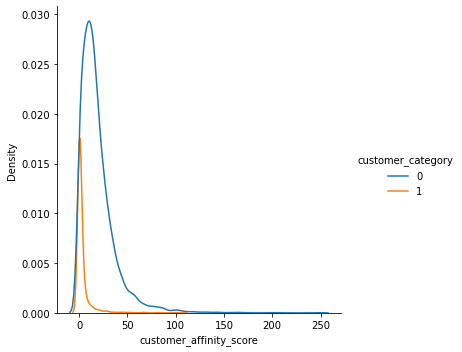

In [77]:
sns.displot(x='customer_affinity_score',data=data,hue='customer_category',kind='kde')

### CONCLUSION - 
- ### Customer belongling to group 1 has more affection to the website
- ### Group 0: mean affinity score 18 with spread 19 
- ### Group 1: mean affinity score 3 with  spread 8

# customer_active_segment  

	the categorization of the customers based on their activity

In [79]:
data['customer_active_segment'].unique()

array(['C', 'AA', 'B', 'A', 'D'], dtype=object)

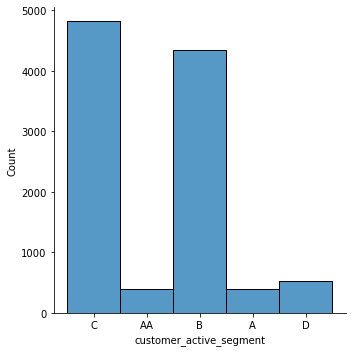

In [80]:
sns.displot(x='customer_active_segment',data=data)

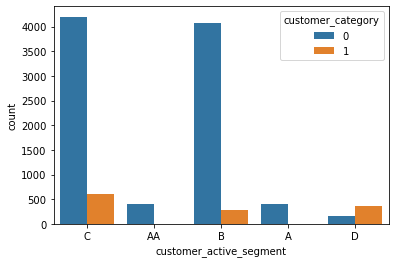

In [91]:
sns.countplot(x='customer_active_segment',data=data,hue='customer_category')

### NOTE- 
according to the train data, if active segment of a cutomer is AA, then the cutomer will belong to group 0 <br>
We will create a new feature, which will take this into account. 

In [92]:
data['is_active_AA'] = np.where(data['customer_active_segment'] == 'AA',1,0)

In [93]:
data['is_active_D'] = np.where(data['customer_active_segment'] == 'D',1,0)

### CONCLUSION 
- ### All of the customers belonging to AA active_segment are from Group 0
- ### If a customer is in D active segment, its very high likely that it belongs to Group 1

# X 1

 	Anonymized feature based on loyalty of the customer

In [95]:
data['X1'].value_counts()

BA    4427
A     2215
F     2200
AA    1574
E       75
Name: X1, dtype: int64

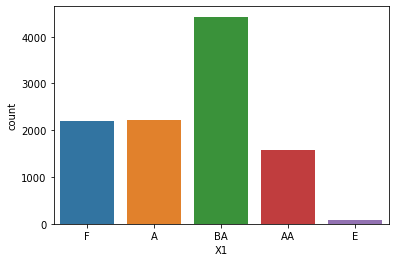

In [97]:
sns.countplot(x='X1',data=data)

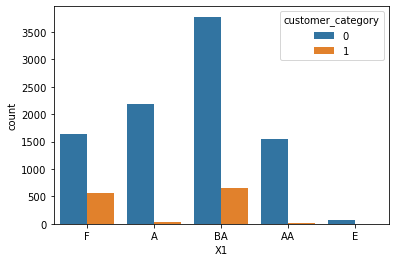

In [98]:
sns.countplot(x='X1',data=data,hue='customer_category')

### NOTE- 
For the categories AA and E, there is pretty high chance that it belongs to group 0 

In [104]:
data['X1_high'] = np.where(data['X1'] == 'E',1,0)

In [105]:
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,is_active_AA,is_active_D,X1_high
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0,0,0,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0,0,0,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0,0,0,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0,1,0,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0,0,0,0
